## Project 2

Will Russell
V00788739

### Perceptron Implementation


In [102]:
from project_code.fileWorker import retrieve_students
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from project_code.data import normalize_student_data
from project_code.perceptron import Perceptron
%matplotlib notebook
import random



In [113]:

male_color = [ .4196,0.957,0.259,.5]
female_color = [ .7, .1843, .6, .5]

def find_intercepts_for_line(weights):
    y_int = -(weights[0]/weights[1])
    x_int = -(weights[0]/weights[2])
    return [0,y_int], [x_int, 0]

def find_intercepts_for_all_lines(weights_list=[[0.,0.,0.],[0.,0.,0.]]):
    values = []
    for weights in weights_list:
        values.append(find_intercepts_for_line(weights))
    return values

def separate_normalized_students(dataset=[], gender_idx=2):
    male_students = [x for x in dataset if x[gender_idx] == 0]
    female_students = [x for x in dataset if x[gender_idx] == 1]
    return male_students, female_students

def separate_and_normalize_students(dataset=[]):
    students = normalize_student_data(dataset)
    return separate_normalized_students(students)

def plot_normalized_data(normal_male_students, normal_female_students,dimensions=2,x_vals=[0,1], y_vals=[1,0]):
    plt.figure()
    male_heights = [x[0] for x in normal_male_students]
    female_heights = [x[0] for x in normal_female_students]
    if dimensions == 2:    
        male_weights = [x[1] for x in normal_male_students]
        female_weights = [x[1] for x in normal_female_students]
    else:
        male_weights = [i for i,x in enumerate(normal_male_students)]
        female_weights = [i for i,x in enumerate(normal_female_students)]
    x1, x2 = x_vals[0], x_vals[1]
    y1, y2 = y_vals[0], y_vals[1]
    plt.title("Student Height/Weight")
    plt.xlabel("Weight")
    plt.ylabel("Height")
    plt.scatter(male_weights,male_heights,marker="s",color=male_color, edgecolors="darkgreen")
    plt.scatter(female_weights, female_heights, marker='o', color=female_color, edgecolors="violet")
    plt.plot([x2, x1],[y2, y1], 'k-', lw=2)
    plt.show()

def plot_animated_data(normal_male_students, normal_female_students, results, dimensions=2):
    # Generate points from normalized male and female students
    
    fig = plt.figure()
    male_heights = [x[0] for x in normal_male_students]
    female_heights = [x[0] for x in normal_female_students]
    if dimensions == 2:
        male_weights = [x[1] for x in normal_male_students]
        female_weights = [x[1] for x in normal_female_students]
        ax = plt.axes(xlim=(0,1), ylim=(0,1))
    else: # dimensions is assumed to be 1
        male_weights = [i for i,x in enumerate(normal_male_students)]
        female_weights= [i for i,x in enumerate(normal_female_students)]
        ax = plt.axes(xlim=(0,len(male_weights)), ylim=(0,1))

    line, = ax.plot([],[], lw=2)
    if dimensions == 2:
        male_points = ax.scatter(male_heights,male_weights,marker="s",color=male_color, edgecolors="darkgreen")
        female_points = ax.scatter(female_heights,female_weights,marker='o', color=female_color, edgecolors="violet")
    else:
        male_points = ax.scatter(male_heights, male_weights,marker="s",color=male_color, edgecolors="darkgreen")
        female_points = ax.scatter(female_heights, male_weights, marker='o', color=female_color, edgecolors="violet")
    weights_list = [x[1] for x in results]
    line_points = find_intercepts_for_all_lines(weights_list)
    ttl = ax.text(.5, 1.05, '', transform = ax.transAxes, va='center')
    #errText = ax.text(.5,.5,'',fontsize=15)

    def init():
        line.set_data([],[])
        ttl.set_text('Iteration : , error :')
        #errText.set_text("Error Sum : ")
        return line

    def animate(i):
        ttl.set_text("Iteration : {}, error : {}".format(i, results[i][2]))
        #errText.set_text("Error Sum : {}".format(results[i][2]))
        x_vals, y_vals = line_points[i]
        line.set_data(x_vals, y_vals)
        return line
    
    return animation.FuncAnimation(fig, animate,init_func=init, frames=iterations, interval=300, blit=True)

    
    


### Randomly select the sample from the normalized student list

In [114]:

students = retrieve_students('./data.txt')

student_list = normalize_student_data(students)
# [x.append(False) for x in student_list]

# untrained_list = [x for x in student_list if x[3] == False]
# print(len(untrained_list))

student_train = random.sample(student_list, 2000)
student_test = random.sample(student_list, 4)
weights = [random.random() for i in range(3)]

male_students, female_students = separate_normalized_students(student_train)


In [115]:
print(weights)

[0.01917413899525322, 0.11645270308620237, 0.30854775447362726]


<IPython.core.display.Javascript object>


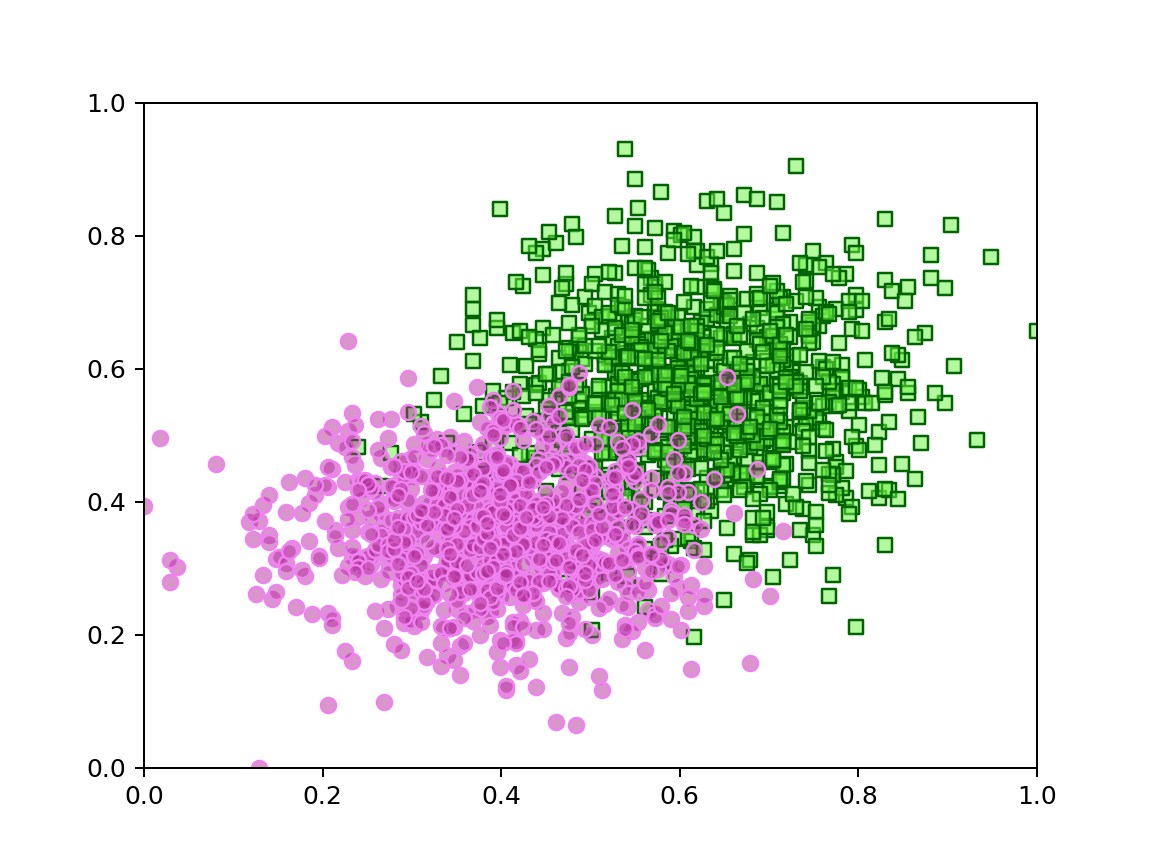

In [116]:
iterations=100
p = Perceptron(ite=iterations, alpha=0.01)
hard_results = p.train(student_train, weights=weights, activation="hard")

anim = plot_animated_data( male_students, female_students, hard_results)
plt.show()

<IPython.core.display.Javascript object>


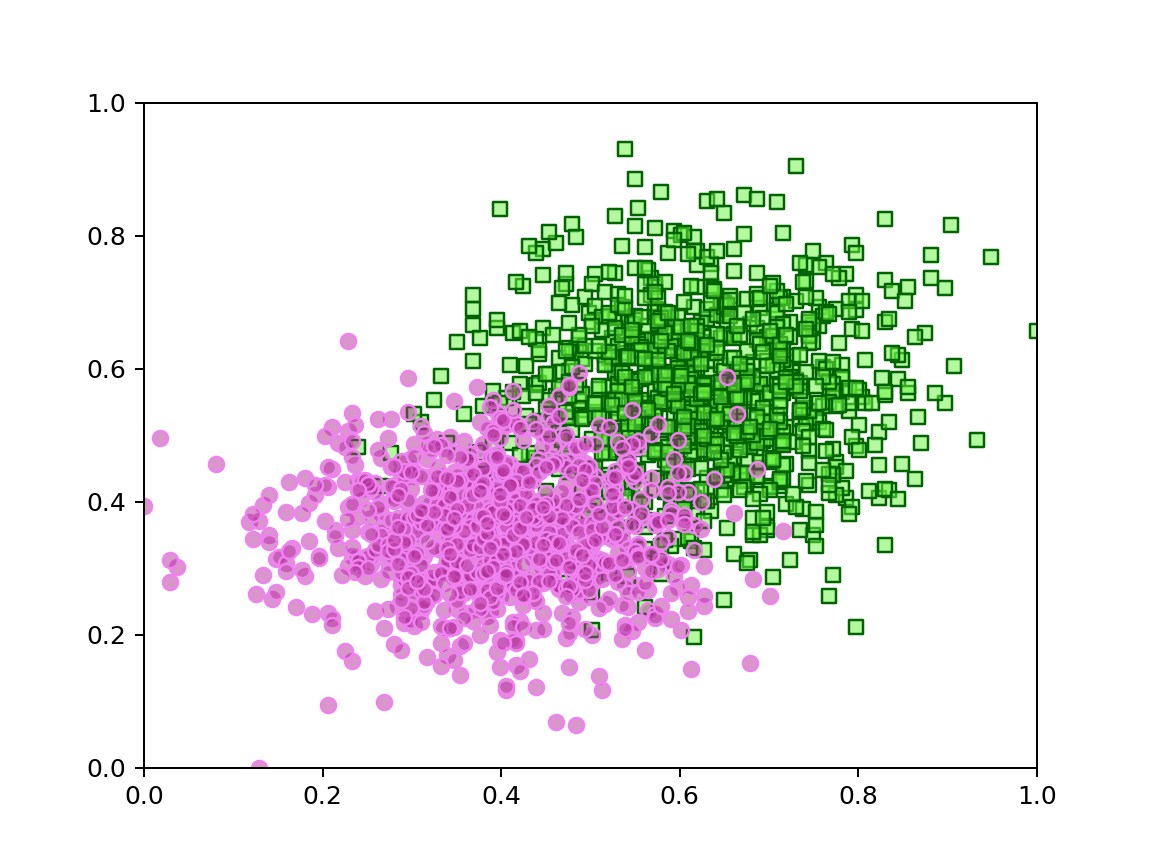

In [117]:
iterations=100
p = Perceptron(ite=iterations, alpha=0.5)
hard_results = p.train(student_train, weights=weights, activation="hard")

anim = plot_animated_data( male_students, female_students, hard_results)
plt.show()


In [118]:
iterations=100
p = Perceptron(ite=iterations, alpha=0.01)
hard_results = p.train(student_train, weights=[0.,0.,0.], activation="hard")

anim = plot_animated_data( male_students, female_students, hard_results)
plt.show()


<IPython.core.display.Javascript object>

In [119]:
iterations=500
p = Perceptron(ite=iterations, alpha=0.1)
hard_results = p.train(student_train, weights=[0.,0.,0.], activation="soft")

anim = plot_animated_data( male_students, female_students, hard_results)
plt.show()


<IPython.core.display.Javascript object>

In [120]:
student_height_list = [[x[0],x[2]] for x in student_list]
student_train = random.sample(student_height_list, 2000)
weights = [random.random() for i in range(2)]




[0.04234173879023251, -0.0782318710159994]


<IPython.core.display.Javascript object>


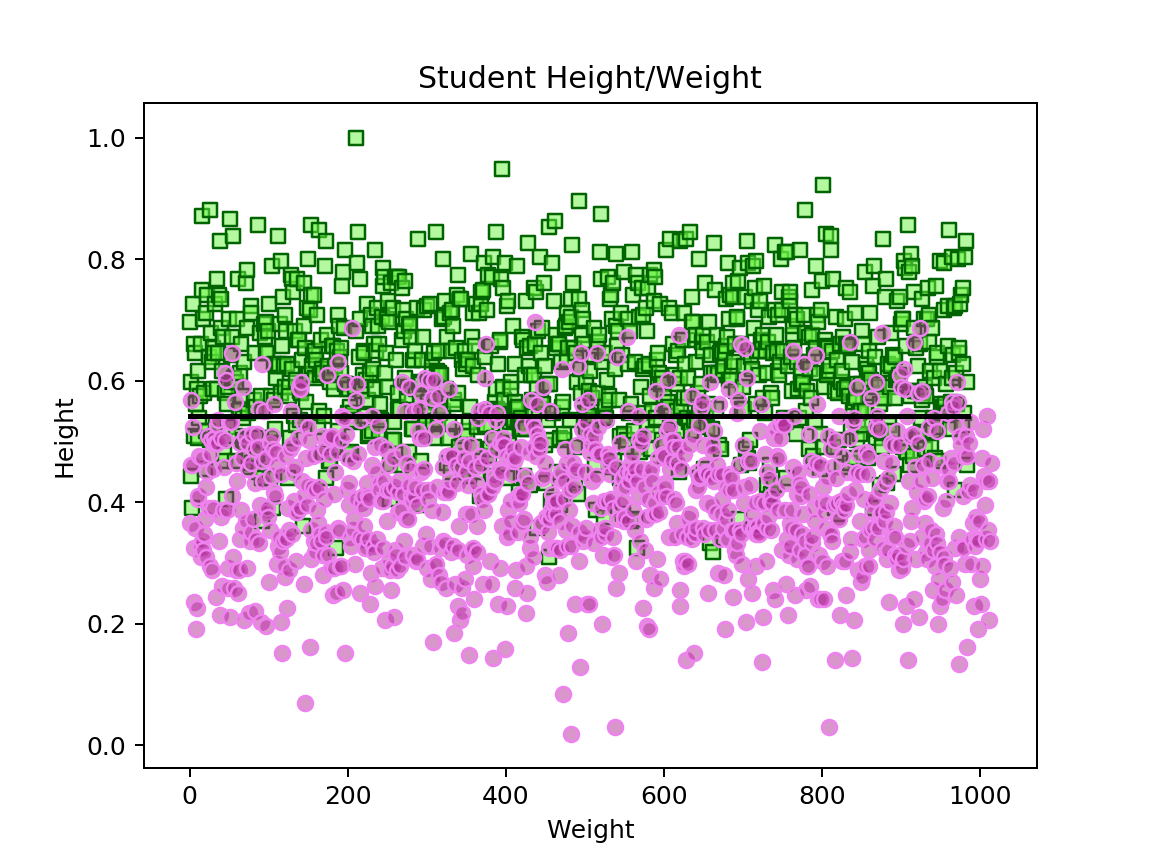

In [124]:
iterations=100
p = Perceptron(ite=iterations, alpha=0.01)
weights = [random.random() for i in range(2)]

hard_results = p.train(student_train, weights=weights, activation="hard")

male_students, female_students = separate_normalized_students(student_train,gender_idx=1)

modified_weights = hard_results[-1][1]
print(modified_weights)

y_intercept = -(modified_weights[0]/modified_weights[1])
plot_normalized_data(male_students, female_students,dimensions=1, x_vals=[0,len(male_students)], y_vals=[y_intercept,y_intercept])
#anim = plot_animated_data( male_students, female_students, hard_results,1)
plt.show()

[8.3472960991824809, -16.234458486388533]


<IPython.core.display.Javascript object>


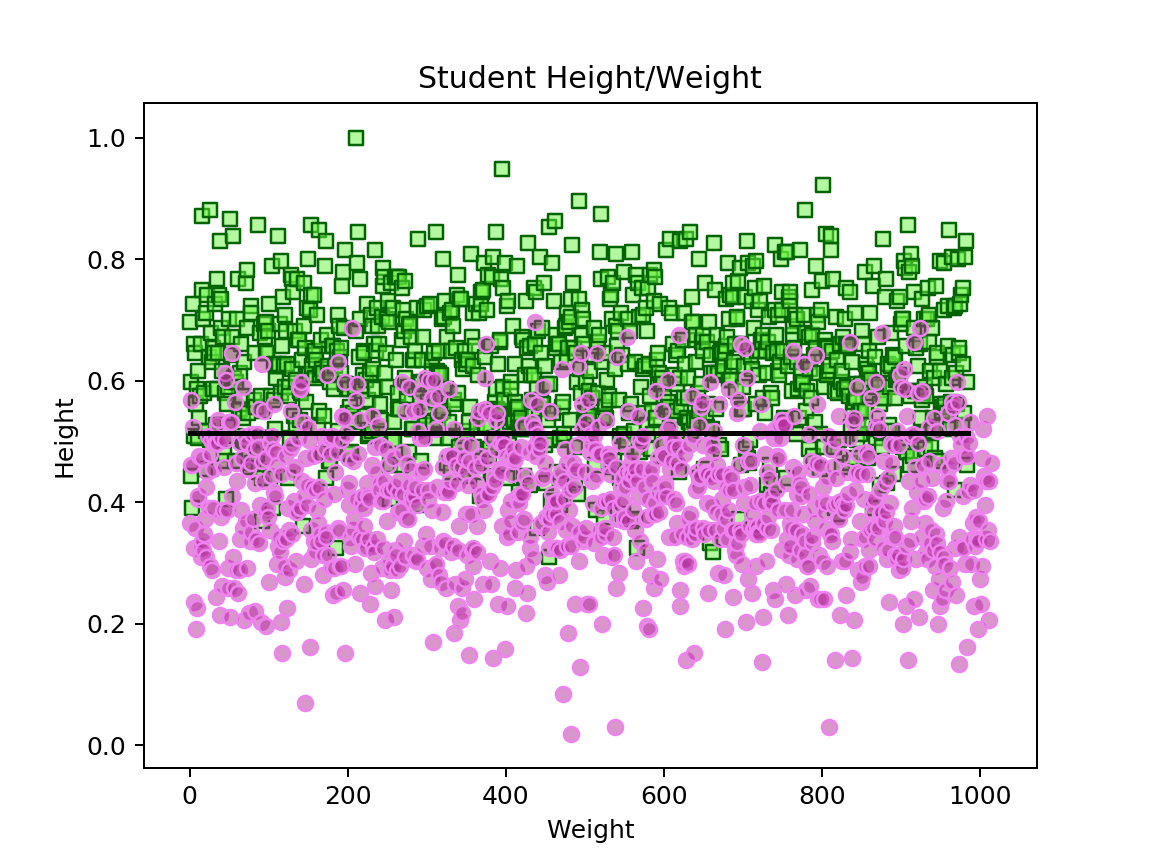

In [123]:
iterations=100
p = Perceptron(ite=iterations, alpha=0.01)
weights = [random.random() for i in range(2)]

hard_results = p.train(student_train, weights=weights, activation="soft")

male_students, female_students = separate_normalized_students(student_train,gender_idx=1)

modified_weights = hard_results[-1][1]
print(modified_weights)

y_intercept = -(modified_weights[0]/modified_weights[1])

plot_normalized_data(male_students, female_students,dimensions=1, x_vals=[0,len(male_students)], y_vals=[y_intercept,y_intercept])
#anim = plot_animated_data( male_students, female_students, hard_results,1)
plt.show()